In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingClassifier
from sklearn.linear_model import SGDRegressor, LinearRegression, BayesianRidge, Lasso, HuberRegressor
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
import seaborn as sns
sns.set(color_codes = True)
from scipy import stats
import xgboost as xgb 
np.random.seed(25)

C:\Users\Architect_shwet\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [90]:
train9 = pd.read_csv("train9.csv")
train1 = pd.read_csv("train1.csv")
test9  = pd.read_csv("test9.csv")
test1 = pd.read_csv("test1.csv")
data = pd.read_csv("hero_data.csv")

In [91]:
train = train9.append(train1)
train = train.append(test9)
train = train.sort_values('user_id')
train = pd.merge(train,data, how = 'left', on = 'hero_id')

test = test1 
test = pd.merge(test,data, how ='left', on = 'hero_id')

In [92]:
def splitroles(text):
    try:
        x = text.split(":")
        if len(x) == 6:
            return x
        else:
            for i in range(6-len(x)):
                x.append("No label")
            return x
    except:
        return ("No label", "No label", "No label", "No label", "No label", "No label")

In [93]:
train = train.drop('num_wins', axis = 1)

In [94]:
train['role_1'], train['role_2'], train['role_3'], train['role_4'], train['role_5'], train['role_6'] = \
zip(*train['roles'].apply(lambda x: splitroles(x)))
test['role_1'], test['role_2'], test['role_3'], test['role_4'], test['role_5'], test['role_6'] = \
zip(*test['roles'].apply(lambda x: splitroles(x)))

train.head(5)

,user_id,hero_id,id,num_games,kda_ratio,primary_attr,attack_type,roles,base_health,base_health_regen,...,projectile_speed,attack_rate,move_speed,turn_rate,role_1,role_2,role_3,role_4,role_5,role_6
0,1,74,1_74,304,3743.699732,int,Ranged,Carry:Nuker:Disabler:Escape:Pusher,200,1.50,...,900,1.7,280,0.5,Carry,Nuker,Disabler,Escape,Pusher,No label
1,1,65,1_65,255,4009.021513,int,Ranged,Initiator:Jungler:Disabler:Escape,200,3.25,...,900,1.7,290,1.0,Initiator,Jungler,Disabler,Escape,No label,No label
2,1,39,1_39,203,5094.621514,int,Ranged,Carry:Nuker:Escape,200,1.50,...,1500,1.5,295,0.5,Carry,Nuker,Escape,No label,No label,No label
3,1,106,1_106,158,4619.212963,agi,Melee,Carry:Escape:Nuker:Disabler:Initiator,200,2.00,...,900,1.7,305,0.5,Carry,Escape,Nuker,Disabler,Initiator,No label
4,1,2,1_2,157,2871.627907,str,Melee,Initiator:Durable:Disabler:Jungler,200,4.25,...,900,1.7,290,0.6,Initiator,Durable,Disabler,Jungler,No label,No label


In [95]:
test.head(5)

,user_id,hero_id,id,num_games,primary_attr,attack_type,roles,base_health,base_health_regen,base_mana,...,projectile_speed,attack_rate,move_speed,turn_rate,role_1,role_2,role_3,role_4,role_5,role_6
0,3,53,3_53,278,int,Ranged,Carry:Jungler:Pusher:Escape:Nuker,200,1.5,75,...,1125,1.70,290,0.6,Carry,Jungler,Pusher,Escape,Nuker,No label
1,4,17,4_17,180,int,Ranged,Carry:Escape:Nuker:Initiator:Disabler,200,1.5,75,...,1100,1.70,285,0.8,Carry,Escape,Nuker,Initiator,Disabler,No label
2,9,51,9_51,70,str,Melee,Initiator:Disabler:Durable:Nuker,200,1.5,75,...,900,1.70,315,0.6,Initiator,Disabler,Durable,Nuker,No label,No label
3,10,54,10_54,189,str,Melee,Carry:Durable:Jungler:Escape:Disabler,200,1.5,75,...,900,1.85,315,1.0,Carry,Durable,Jungler,Escape,Disabler,No label
4,15,74,15_74,263,int,Ranged,Carry:Nuker:Disabler:Escape:Pusher,200,1.5,75,...,900,1.70,280,0.5,Carry,Nuker,Disabler,Escape,Pusher,No label


In [96]:
train.head(5)

,user_id,hero_id,id,num_games,kda_ratio,primary_attr,attack_type,roles,base_health,base_health_regen,...,projectile_speed,attack_rate,move_speed,turn_rate,role_1,role_2,role_3,role_4,role_5,role_6
0,1,74,1_74,304,3743.699732,int,Ranged,Carry:Nuker:Disabler:Escape:Pusher,200,1.50,...,900,1.7,280,0.5,Carry,Nuker,Disabler,Escape,Pusher,No label
1,1,65,1_65,255,4009.021513,int,Ranged,Initiator:Jungler:Disabler:Escape,200,3.25,...,900,1.7,290,1.0,Initiator,Jungler,Disabler,Escape,No label,No label
2,1,39,1_39,203,5094.621514,int,Ranged,Carry:Nuker:Escape,200,1.50,...,1500,1.5,295,0.5,Carry,Nuker,Escape,No label,No label,No label
3,1,106,1_106,158,4619.212963,agi,Melee,Carry:Escape:Nuker:Disabler:Initiator,200,2.00,...,900,1.7,305,0.5,Carry,Escape,Nuker,Disabler,Initiator,No label
4,1,2,1_2,157,2871.627907,str,Melee,Initiator:Durable:Disabler:Jungler,200,4.25,...,900,1.7,290,0.6,Initiator,Durable,Disabler,Jungler,No label,No label


In [106]:
train.dtypes

user_id                    int64
num_games                  int64
primary_attr              object
attack_type               object
base_health_regen        float64
base_armor               float64
base_magic_resistance      int64
base_attack_min            int64
base_attack_max            int64
base_strength              int64
base_agility               int64
base_intelligence          int64
strength_gain            float64
agility_gain             float64
intelligence_gain        float64
attack_range               int64
projectile_speed           int64
attack_rate              float64
move_speed                 int64
turn_rate                float64
role_1                    object
role_2                    object
role_3                    object
role_4                    object
role_5                    object
role_6                    object
dtype: object

In [107]:
train['primary_attr'] = train['primary_attr'].replace(to_replace = {'agi': 0, 'int': 1, 'str': 2})
train['attack_type'] = train['attack_type'].replace(to_replace = {
    'Ranged': 0, 'Melee': 1})

test['primary_attr'] = test['primary_attr'].replace(to_replace = {'agi': 0, 'int': 1, 'str': 2})
test['attack_type'] = test['attack_type'].replace(to_replace = {
    'Ranged': 0, 'Melee': 1})

In [108]:
from sklearn.preprocessing import LabelEncoder

for c in train.columns:
    if train[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(train[c].values) + list(test[c].values))
        train[c] = lbl.transform(list(train[c].values))
        test[c] = lbl.transform(list(test[c].values))

In [100]:
train = train.drop('roles', axis = 1)

In [101]:
test = test.drop('roles', axis = 1)

In [102]:
target = train['kda_ratio']
train = train.drop('kda_ratio', axis = 1)

In [103]:
train = train.drop(['hero_id', 'id', 'base_health','base_mana'], axis = 1)

In [104]:
test = test.drop(['hero_id', 'id', 'base_health','base_mana'], axis = 1)

In [105]:
test = test.drop('base_mana_regen', axis = 1)
train = train.drop('base_mana_regen', axis = 1)

# Machine Learning starts

In [113]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.2, random_state = 0)
from sklearn.metrics import mean_squared_error
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

In [115]:
from xgboost import XGBRegressor
model = XGBRegressor(colsample_bytree=0.2,
                        gamma=0.0,
                        learning_rate=0.6,
                        max_depth=5,
                        min_child_weight=2.5,
                        n_estimators=1000,#50,000
                        reg_alpha=0.4,
                        reg_lambda=0.6,
                       subsample=0.8,
                      seed=42,
                      silent=1)

model.fit(X_train, y_train)
pred_xgb = model.predict(X_test)
print("XGBoost score on test set: ", rmse(y_test, pred_xgb))

XGBoost score on test set:  753.129677087


In [48]:
# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective="reg:linear", n_estimators=3000, seed=123)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds= xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))


RMSE: 809.322421


In [ ]:
model = RandomForestRegressor()
model.fit(train[feature_names], target)
pred_rf = model.predict(test[feature_names])

In [166]:
### Running Xgboost
def runXGB(train_X, train_y, test_X, test_y, test_X2=None, seed_val=0, rounds=1000, dep=5, eta=0.5):
    params = {}
    params["objective"] = "reg:linear"
    params['eval_metric'] = 'rmse'
    params["eta"] = eta
    params["subsample"] = 0.7
    params["min_child_weight"] = 50
    params["colsample_bytree"] = 0.5
    params["max_depth"] = dep
    params["silent"] = 1
    params["seed"] = seed_val
    params["num_boosting_rounds"] = 450
    params["lambda"] = 30
    #params["max_delta_step"] = 2
    #params["gamma"] = 0.5
    num_rounds = rounds

    plst = list(params.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)

    
    xgtest = xgb.DMatrix(test_X, label=test_y)
    watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
    model = xgb.train(plst, xgtrain, num_rounds, watchlist, early_stopping_rounds=100, verbose_eval=20)
    pred_test_y = model.predict(xgtest, ntree_limit=model.best_ntree_limit)
    return pred_test_y, model

In [181]:
### Running Xgboost
def runXGB(train_X, train_y, test_X, test_y, test_X2=None, seed_val=0, rounds=1000, dep=5, eta=0.5):
    params = {}
    params["objective"] = "reg:linear"
    
    #params["max_delta_step"] = 2
    #params["gamma"] = 0.5
    num_rounds = rounds

    plst = list(params.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)

    
    xgtest = xgb.DMatrix(test_X, label=test_y)
    watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
    model = xgb.train(plst, xgtrain, num_rounds, watchlist, early_stopping_rounds=100, verbose_eval=20)
    pred_test_y = model.predict(xgtest, ntree_limit=model.best_ntree_limit)
    return pred_test_y, model

In [182]:
pred_test_y, model = runXGB(X_train, y_train, X_test, y_test,
                                                 seed_val=0, 
                                                rounds=1000, dep=8, eta=0.05)


[0]	train-rmse:2654.16	test-rmse:2643.97
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 100 rounds.
[20]	train-rmse:733.659	test-rmse:792.789
[40]	train-rmse:682.404	test-rmse:773.94
[60]	train-rmse:644.119	test-rmse:762.984
[80]	train-rmse:607.852	test-rmse:753.612
[100]	train-rmse:582.946	test-rmse:748.748
[120]	train-rmse:560.14	test-rmse:748.55
[140]	train-rmse:536.887	test-rmse:743.642
[160]	train-rmse:513.422	test-rmse:738.892
[180]	train-rmse:494.939	test-rmse:735.026
[200]	train-rmse:477.796	test-rmse:734.194
[220]	train-rmse:464.393	test-rmse:733.228
[240]	train-rmse:450.668	test-rmse:730.294
[260]	train-rmse:434.567	test-rmse:729.841
[280]	train-rmse:420.876	test-rmse:727.906
[300]	train-rmse:408.978	test-rmse:726.969
[320]	train-rmse:399.731	test-rmse:726.408
[340]	train-rmse:387.333	test-rmse:724.355
[360]	train-rmse:374.655	test-rmse:722.59
[380]	train-rmse:365.273	test-rmse:721.028
[400]	

In [183]:
# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, pred_test_y))
print("RMSE: %f" % (rmse))

RMSE: 714.729785


In [169]:
# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test =  xgb.DMatrix(data = X_test, label = y_test)

# Create the parameter dictionary: params
params = {"objective":"reg:linear"}

# Train the model: xg_reg
xg_reg = xgb.train(dtrain = DM_train, params=params, num_boost_round=450)

# Predict the labels of the test set: preds
preds = xg_reg.predict(DM_test)

# Compute and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))


RMSE: 721.126954


In [125]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data= train, label= target)

reg_params = [20, 25, 30]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:linear"}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg
    
    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2", "rmse"]))


Best rmse as a function of l2:
   l2        rmse
0  20  885.068665
1  25  884.488861
2  30  883.370606


In [173]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data= train, label= target)

reg_lambda = [20, 25, 30]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:linear"}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg
    
    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2, num_boost_round=450, metrics="rmse", as_pandas=True, seed=123)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2", "rmse"]))

Best rmse as a function of l2:
   l2        rmse
0  20  870.737304
1  25  857.734192
2  30  879.747161


In [124]:
# Create your housing DMatrix
housing_dmatrix = xgb.DMatrix(data= train ,label= target)

# Create the parameter dictionary
params={"objective":"reg:linear","max_depth":5,
                                             "eta": 0.6, "reg_params": 30}

# Create list of hyperparameter values
colsample_bytree_vals = [0.46, 0.5, 0.56]
best_rmse = []

# Systematically vary the hyperparameter value 
for curr_val in colsample_bytree_vals:

    params["colsample_bytree"] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2,
                 num_boost_round=5, early_stopping_rounds=10,
                 metrics="rmse", as_pandas=True, seed=123)
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(colsample_bytree_vals, best_rmse)), columns=["colsample_bytree","best_rmse"]))


   colsample_bytree   best_rmse
0              0.46  870.334564
1              0.50  869.586395
2              0.56  871.729431


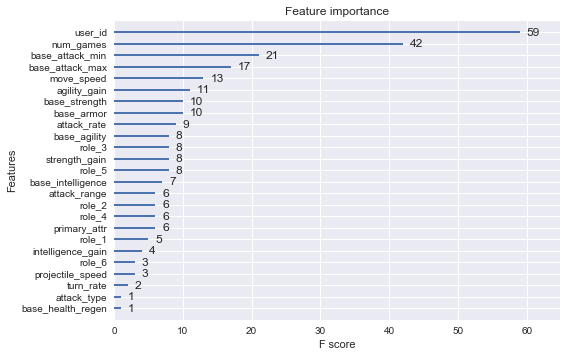

In [126]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data = train, label = target)

# Create the parameter dictionary: params
params = {"objective":"reg:linear","max_depth": 5, "eta": 0.5, "colsample_bytree": 0.5, "reg_params": 30}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()

In [144]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=train, label=target)

# Create the parameter dictionary for each tree: params 
params = {"objective":"reg:linear", "max_depth":5, "eta": 0.5, "colsample_bytree": 0.5, "reg_params": 30}

# Create list of number of boosting rounds
num_rounds = [425, 450, 500]

# Empty list to store final round rmse per XGBoost model
final_rmse_per_round = []

# Iterate over num_rounds and build one model per num_boost_round parameter
for curr_num_rounds in num_rounds:

    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, num_boost_round=curr_num_rounds, metrics="rmse", as_pandas=True, seed=123)
    
    # Append final round RMSE
    final_rmse_per_round.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
num_rounds_rmses = list(zip(num_rounds, final_rmse_per_round))
print(pd.DataFrame(num_rounds_rmses,columns=["num_boosting_rounds","rmse"]))


   num_boosting_rounds        rmse
0                  425  822.882935
1                  450  822.015116
2                  500  822.040283


In [186]:
# Create your housing DMatrix
housing_dmatrix = xgb.DMatrix(data= train ,label= target)

# Create the parameter dictionary
params={"objective":"reg:linear"}

# Create list of hyperparameter values
min_child_weight_l = [50, 75, 100]

best_rmse = []

# Systematically vary the hyperparameter value 
for curr_val in min_child_weight_l:

    params["min_child_weight"] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2,
                 num_boost_round=450, early_stopping_rounds=100,
                 metrics="rmse", as_pandas=True, seed=123)
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(min_child_weight_l, best_rmse)), columns=["min_child_weight","best_rmse"]))

   min_child_weight   best_rmse
0                50  836.904144
1                75  837.732727
2               100  837.723327


In [75]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data= train , label= target)

# Create the parameter dictionary for each tree (boosting round)
params = {"objective":"reg:linear", "max_depth":5}

# Create list of eta values and empty list to store final round rmse per xgboost model
eta_vals = [0.4, 0.5, 0.6]
best_rmse = []

# Systematically vary the eta
for curr_val in eta_vals:
    
    params["eta"] = curr_val   
    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2,
                        num_boost_round=10, early_stopping_rounds=5,
                        metrics="rmse", as_pandas=True, seed=123)
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(eta_vals, best_rmse)), columns=["eta","best_rmse"]))


   eta   best_rmse
0  0.4  900.809021
1  0.5  885.045319
2  0.6  899.536377


In [74]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data= train ,label= target)

# Create the parameter dictionary
params = {"objective":"reg:linear", "eta": 0.5}

# Create list of max_depth values
max_depths = [2, 5, 10, 20]
best_rmse = []

# Systematically vary the max_depth
for curr_val in max_depths:

    params["max_depth"] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2,
                 num_boost_round=450, early_stopping_rounds=5,
                 metrics="rmse", as_pandas=True, seed=123)
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(max_depths, best_rmse)),columns=["max_depth","best_rmse"]))


   max_depth   best_rmse
0          2  904.040985
1          5  885.045319
2         10  909.610168
3         20  961.657867


In [135]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=train, label= target)

# Create the parameter dictionary for each tree: params
params = {"objective":"reg:linear", "max_depth":5}

# Perform cross-validation with early stopping: cv_results
cv_results = xgb.cv(dtrain = housing_dmatrix, params= params, num_boost_round=450, early_stopping_rounds=10, metrics ="rmse", as_pandas=True, seed= 123)

# Print cv_results
print(cv_results)


    test-rmse-mean  test-rmse-std  train-rmse-mean  train-rmse-std
0      2662.965169      14.081918      2659.028158        5.988665
1      1975.165080      15.774071      1967.186686        7.140389
2      1526.976237      18.432803      1513.203206        7.379236
3      1246.670044      19.547542      1225.786296        6.398077
4      1081.654744      21.012437      1051.204508        8.829174
5       987.124003      19.740630       951.579529        7.104562
6       934.857910      23.115658       894.779724        5.732829
7       907.956563      22.633035       864.077169        6.986036
8       892.405314      22.725397       841.393412        4.732379
9       884.705729      22.890284       831.436015        4.977935
10      878.911926      22.400067       824.210897        4.832237
11      876.645019      21.250059       818.028626        3.092222
12      873.263834      21.075153       813.637003        3.263474
13      871.895467      20.940928       810.762024        3.49

# Gradient boosting regressor

In [112]:
model = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.5,
                                   max_depth=4, max_features='sqrt',
                                  min_samples_leaf=15, min_samples_split=10, 
                                    loss='huber', random_state =5)


model.fit(X_train, y_train)
pred_xgb = model.predict(X_test)
print("gradBoost score on test set: ", rmse(y_test, pred_xgb))

gradBoost score on test set:  747.988695618


# Random Forest

In [79]:
### Running Random Forest
def runRF(train_X, train_y, test_X, test_y, depth=20, leaf=10, feat=0.2):
    model = RandomForestRegressor( n_estimators = 1000,
                    max_depth = depth,
                    min_samples_split = 2,
                    min_samples_leaf = leaf,
                    max_features =  feat,
                    n_jobs = 4,
                    random_state = 0)
    model.fit(train_X, train_y)
    train_preds = model.predict(train_X)
    test_preds = model.predict(test_X)
    test_loss = 0
    train_loss = metrics.mean_squared_error(train_y, train_preds)
    test_loss = metrics.mean_squared_error(test_y, test_preds)
    print("Train and Test loss : ", train_loss, test_loss)
    return test_preds, test_loss, model

In [80]:
from sklearn import metrics
rf_test, rf_loss,model_rf  = runRF(X_train, y_train, X_test, y_test)

Train and Test loss :  609226.028854 671570.13464


In [82]:
# Compute and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test,rf_test))
print("RMSE: %f" % (rmse))

RMSE: 819.493828


# Lightgbm

In [187]:
import lightgbm as lgb

In [194]:
def runLGB(train_X, train_y, test_X, test_y, test_X2=None, feature_names=None, seed_val=0, rounds=500, dep=8, eta=0.05):
    params = {}
    params["objective"] = "regression"
    params['metric'] = 'rmse'
    params["max_depth"] = dep
    params["min_data_in_leaf"] = 20
    params["learning_rate"] = eta
    params["bagging_fraction"] = 0.7
    params["feature_fraction"] = 0.7
    params["bagging_freq"] = 5
    params["bagging_seed"] = seed_val
    params["verbosity"] = 0
    num_rounds = rounds
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    
    lgtest = lgb.Dataset(test_X, label=test_y)
    model = lgb.train(params, lgtrain, num_rounds, valid_sets=[lgtest], early_stopping_rounds=100, verbose_eval=20)
    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    
    loss = 0
    loss = metrics.mean_squared_error(test_y, pred_test_y)
    print(loss)
    return pred_test_y, loss, model


In [195]:
pred_test_lgm, loss_lgm, model_lgm = runLGB(X_train, y_train, X_test, y_test)

Training until validation scores don't improve for 100 rounds.
[20]	valid_0's rmse: 845.277
[40]	valid_0's rmse: 804.847
[60]	valid_0's rmse: 790.813
[80]	valid_0's rmse: 784.582
[100]	valid_0's rmse: 781.06
[120]	valid_0's rmse: 778.499
[140]	valid_0's rmse: 776.34
[160]	valid_0's rmse: 775.992
[180]	valid_0's rmse: 774.518
[200]	valid_0's rmse: 777.366
[220]	valid_0's rmse: 777.206
[240]	valid_0's rmse: 776.243
[260]	valid_0's rmse: 776.337
Early stopping, best iteration is:
[176]	valid_0's rmse: 774.417
599721.127618


In [196]:
# Compute and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test,pred_test_lgm))
print("RMSE: %f" % (rmse))

RMSE: 774.416637
